![](https://i.imgur.com/0AUxkXt.png)

# **EXAM - THE DATA ANALYSIS**

<img src='https://www.inzata.com/wp-content/uploads/2020/03/shutterstock_1562999674-scaled.jpg' width=700>

In this section, you will be given one dataset and tasked with related problems to solve using the tools that we learned including: Pandas, Matplotlib, & Seaborn

- The question is open, you should attempt to provide a detailed analysis on those questions.

- Please note that you will also be given points for how well your explain and present your analysis.

__To Answer:__

Write our answers in the __Your Answer__ section under each question. Your answer should contain:
- Python code for data cleaning, manipulation and exploration. Keep the output of the code in your notebook.
- Markdown (Text Cell) for explaination and analysis.

### **Case Study**: Your are given the dataset on the number of **comfirmed**, **deaths**, and **recovery cases** from 2019 Novel Corona Virus. You are required to complete the following tasks 
![](https://www.aljazeera.com/mritems/Images/2020/3/4/b9d6e9c0f8774beda9ce21bb0eacbfe2_7.jpg)

In [238]:
# Import Data
import pandas as pd

confirmed  = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths     = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

*Data Dictionary*

Make sure you read this carefully. This will help you a lot.

| Variable | Definition |
|:--:|:--:|
| Province/State | Name of Province and State within the Country |
| Country/Region | Name of Country |
| Lat | Latitude of the Province |
| Long | Longitude of the Province |
| Day Columns | Report data in cummulative sum |

#### **Q1** *(30pts)*: Write a **function** that reports the __latest__ situation of the Corona Virus in a __given country__.

The function takes one argument as input - the country where the report is from, and prints out the following information:
- The country where the report is from
- Total confirmed cases
- Total death
- Total recovered

In [239]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [240]:
#wide to long table for future calculation
df_confirmed = confirmed.melt(id_vars = confirmed.columns[:4], value_vars = confirmed.columns[4:], var_name = "Date", value_name = "Confirmed")
df_deaths = deaths.melt(id_vars = deaths.columns[:4], value_vars = deaths.columns[4:], var_name = "Date", value_name = "Deaths")
df_recoveries = recoveries.melt(id_vars = recoveries.columns[:4], value_vars = recoveries.columns[4:], var_name = "Date", value_name = "Recoveries")


In [241]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  104013 non-null  object 
 1   Country/Region  330327 non-null  object 
 2   Lat             328041 non-null  float64
 3   Long            328041 non-null  float64
 4   Date            330327 non-null  object 
 5   Confirmed       330327 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 15.1+ MB


In [242]:
df_confirmed.isnull().sum()

Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
Date                   0
Confirmed              0
dtype: int64

In [243]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  104013 non-null  object 
 1   Country/Region  330327 non-null  object 
 2   Lat             328041 non-null  float64
 3   Long            328041 non-null  float64
 4   Date            330327 non-null  object 
 5   Deaths          330327 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 15.1+ MB


In [244]:
df_deaths.isnull().sum()

Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
Date                   0
Deaths                 0
dtype: int64

In [245]:
df_recoveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313182 entries, 0 to 313181
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  85725 non-null   object 
 1   Country/Region  313182 non-null  object 
 2   Lat             312039 non-null  float64
 3   Long            312039 non-null  float64
 4   Date            313182 non-null  object 
 5   Recoveries      313182 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [246]:
df_recoveries.isnull().sum()

Province/State    227457
Country/Region         0
Lat                 1143
Long                1143
Date                   0
Recoveries             0
dtype: int64

In [247]:
#merge into 1 dataframe
df_full = pd.DataFrame({"Country/Region": df_confirmed["Country/Region"],
                        "Province/State": df_confirmed["Province/State"],
                        "Lat": df_confirmed["Lat"], 
                        "Long": df_confirmed["Long"],
                        "Date": df_confirmed["Date"], 
                        "Confirmed": df_confirmed["Confirmed"], 
                        "Deaths": df_deaths["Deaths"], 
                        "Recoveries": df_recoveries["Recoveries"]})
df_full["Date"] = pd.to_datetime(df_full["Date"])
df_full.head()

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recoveries
0,Afghanistan,NaN,33.93911,67.709953,2020-01-22,0,0,0.0
1,Albania,NaN,41.15330,20.168300,2020-01-22,0,0,0.0
2,Algeria,NaN,28.03390,1.659600,2020-01-22,0,0,0.0
3,Andorra,NaN,42.50630,1.521800,2020-01-22,0,0,0.0
4,Angola,NaN,-11.20270,17.873900,2020-01-22,0,0,0.0


In [248]:
df_full.duplicated().sum()

0

In [249]:
df_full.isnull().sum()

Country/Region         0
Province/State    226314
Lat                 2286
Long                2286
Date                   0
Confirmed              0
Deaths                 0
Recoveries         17145
dtype: int64

In [250]:
# define a function to print total confirmed, deaths, recoveries once a country name is given.
def query(country):
    total_confirmed = df_full[(df_full["Country/Region"] == country) & (df_full["Date"] == df_full["Date"].max())]["Confirmed"].sum()
    total_deaths = df_full[(df_full["Country/Region"] == country) & (df_full["Date"] == df_full["Date"].max())]["Deaths"].sum()
    total_recoveries = df_full[(df_full["Country/Region"] == country) & (df_full["Date"] == df_full["Date"].max())]["Recoveries"].sum()
    print({"Country": country,
           "Total confirmed cases": total_confirmed,
          "Total deaths": total_deaths,
          "Total recoveries": total_recoveries}) 
query("China")

{'Country': 'China', 'Total confirmed cases': 4903524, 'Total deaths': 101056, 'Total recoveries': 0.0}


#### **Q2** *(30pts)* Visualize the situation **until October 31st, 2020**. 

Determine the top 5 countries by the total number of confirmed cases 
**until October 31st, 2020**. 

From those 5 countries, plot the charts for each of them visualising the number of confirmed, death and recovered cases over time from the beginning **until October 31st, 2020**.  

*There should be three plots for confirmed, death and recovered.*

In [324]:
# Your code here
# Feel free to add more code and text cells
top_country = df_full[df_full["Date"] == "2020-10-31"].groupby("Country/Region")["Confirmed"].sum().sort_values(ascending = False).head(5)
top_country


Country/Region
US        9176352
India     8184082
Brazil    5537763
Russia    1606267
France    1414396
Name: Confirmed, dtype: int64

In [325]:
df_country = pd.DataFrame(df_full.groupby(["Country/Region","Date"])[["Confirmed","Deaths","Recoveries"]].sum())
df_country.reset_index(inplace = True)
df_top_country = df_country[(df_country["Country/Region"].isin(top_country.index.to_list())) & (df_country["Date"] <= "2020-10-31")]

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

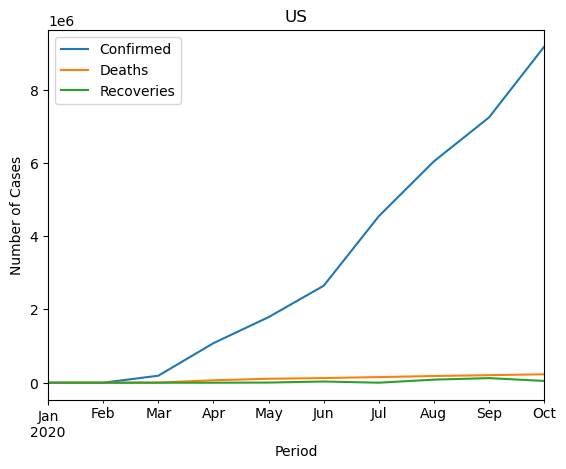

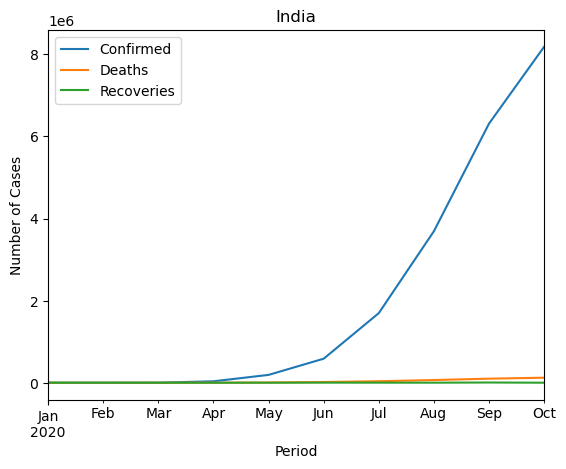

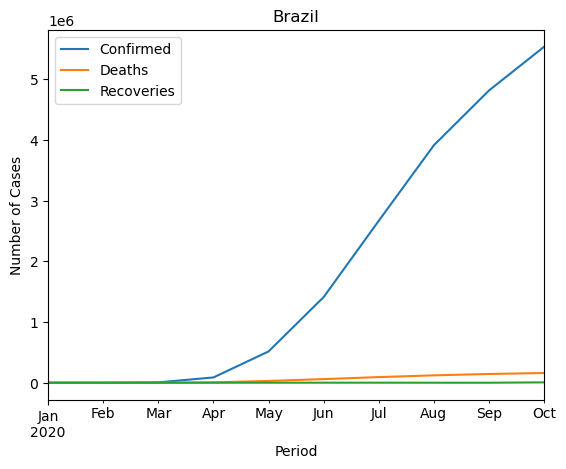

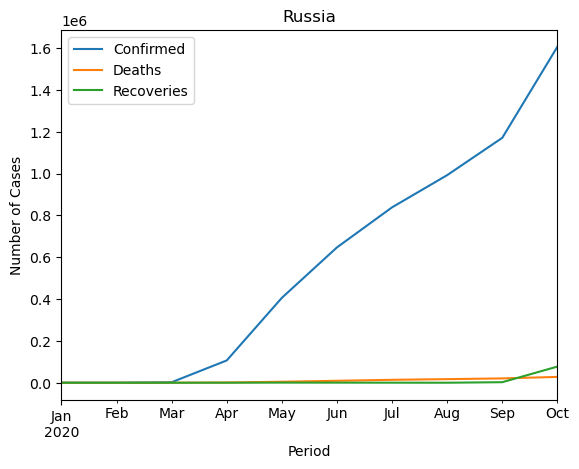

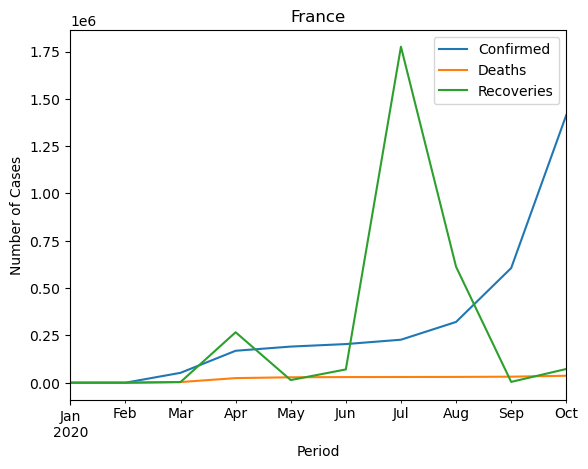

In [338]:
for country in top_country.index.to_list():
    country_data = df_top_country[df_top_country["Country/Region"] == country].set_index("Date")
    country_confirmed = country_data['Confirmed'].asfreq("M")
    country_deaths = country_data["Deaths"].asfreq("M")
    country_recoveries = country_data["Recoveries"].asfreq("M")

    plt.figure()
    plt.title(country)
    country_confirmed.plot()
    country_deaths.plot()
    country_recoveries.plot()
    plt.xlabel("Period")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()
    

#### **Q3** *(40pts)* (OPEN QUESTION) **Until October 31st, 2020**, among the top 5 countries 
identified, which country/countries should we pay special attention to? Support your arguments with further analysis and visualization.

_Your explaination & analysis here_

In [ ]:
# Your code here
# Feel free to add more code and text cells
